In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df=pd.read_csv("cardekho.csv")

In [19]:
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [20]:
df.shape

(8128, 12)

In [21]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [22]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [23]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [24]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [25]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [27]:
df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [28]:
df[["mileage(km/ltr/kg)","engine","max_power","seats"]].head(10)

,mileage(km/ltr/kg),engine,max_power,seats
0,23.40,1248.0,74,5.0
1,21.14,1498.0,103.52,5.0
2,17.70,1497.0,78,5.0
3,23.00,1396.0,90,5.0
4,16.10,1298.0,88.2,5.0
5,20.14,1197.0,81.86,5.0
6,17.30,1061.0,57.5,5.0
7,16.10,796.0,37,4.0
8,23.59,1364.0,67.1,5.0
9,20.00,1399.0,68.1,5.0


In [29]:
null=df[df[["mileage(km/ltr/kg)","engine","max_power","seats"]].isnull()]

In [30]:
null.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
import sklearn

In [32]:
df["max_power"] = pd.to_numeric(df["max_power"], errors='coerce')

In [33]:
from sklearn.impute import KNNImputer
inputer=KNNImputer(n_neighbors=5)
df[["mileage(km/ltr/kg)", "engine", "seats","max_power"]]=inputer.fit_transform(df[["mileage(km/ltr/kg)", "engine", "seats","max_power"]])

In [34]:
df.isnull().sum()

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64

In [35]:
df["max_power"].dtype

dtype('float64')

In [36]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [37]:
df["name"].value_counts()

name
Maruti Swift Dzire VDI                             129
Maruti Alto 800 LXI                                 82
Maruti Alto LXi                                     71
BMW X4 M Sport X xDrive20d                          62
Maruti Swift VDI                                    61
                                                  ... 
Skoda Fabia 1.4 TDI Ambiente                         1
Mahindra Scorpio VLX 2WD AT BSIII                    1
Renault KWID Climber 1.0 AMT                         1
Mahindra XUV300 W8 Option Dual Tone Diesel BSIV      1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV         1
Name: count, Length: 2058, dtype: int64

In [38]:
df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats
count,8128.000000,8.128000e+03,8.128000e+03,8128.000000,8128.000000,8128.000000,8128.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.415108,1458.135873,91.510906,5.417298
std,4.044249,8.062534e+05,5.655055e+04,3.984171,497.343260,35.348900,0.946690
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.800000,1197.000000,68.100000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.418783,1248.000000,83.100000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.277500,1582.000000,101.250000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [39]:
for column in df.select_dtypes(include=['object']).columns:
    print(f"Values in column '{column}':")
    print(df[column].values)  
    print()

Values in column 'name':
['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Maruti Swift Dzire ZDi' 'Tata Indigo CR4'
 'Tata Indigo CR4']

Values in column 'fuel':
['Diesel' 'Diesel' 'Petrol' ... 'Diesel' 'Diesel' 'Diesel']

Values in column 'seller_type':
['Individual' 'Individual' 'Individual' ... 'Individual' 'Individual'
 'Individual']

Values in column 'transmission':
['Manual' 'Manual' 'Manual' ... 'Manual' 'Manual' 'Manual']

Values in column 'owner':
['First Owner' 'Second Owner' 'Third Owner' ... 'First Owner'
 'First Owner' 'First Owner']



In [40]:
def car_names(names):
    first_name = names.split(' ')[0]
    return first_name

In [41]:
#example
car_names("Skoda Rapid 1.5 TDI Ambition")

'Skoda'

In [42]:
df['name']=df['name'].apply(car_names)

In [43]:
df['name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [44]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [45]:
from sklearn.preprocessing import LabelEncoder
ll = LabelEncoder()
df["fuel"] = ll.fit_transform(df["fuel"])
df["seller_type"] = ll.fit_transform(df["seller_type"])
df["transmission"] = ll.fit_transform(df["transmission"])
df["owner"] = ll.fit_transform(df["owner"])


In [46]:
df['name'].replace(
    ['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
     'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
     'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
     'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
     'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 
     21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
    inplace=True
)


C:\Users\GUNATEJA\AppData\Local\Temp\ipykernel_41204\3342586508.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].replace(
C:\Users\GUNATEJA\AppData\Local\Temp\ipykernel_41204\3342586508.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['name'].replace(


In [47]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,1,2014,450000,145500,1,1,1,0,23.40,1248.0,74.00,5.0
1,2,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,3,2006,158000,140000,3,1,1,4,17.70,1497.0,78.00,5.0
3,4,2010,225000,127000,1,1,1,0,23.00,1396.0,90.00,5.0
4,1,2007,130000,120000,3,1,1,0,16.10,1298.0,88.20,5.0


In [48]:
df['transmission'].unique()

array([1, 0])

In [49]:
df['name'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
      dtype=int64)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   int64  
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   int32  
 5   seller_type         8128 non-null   int32  
 6   transmission        8128 non-null   int32  
 7   owner               8128 non-null   int32  
 8   mileage(km/ltr/kg)  8128 non-null   float64
 9   engine              8128 non-null   float64
 10  max_power           8128 non-null   float64
 11  seats               8128 non-null   float64
dtypes: float64(4), int32(4), int64(4)
memory usage: 635.1 KB


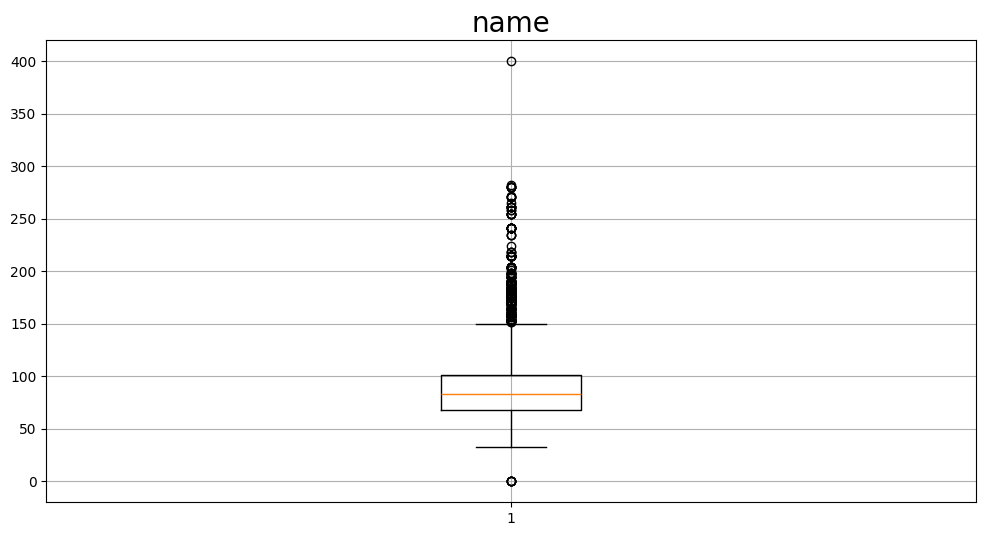

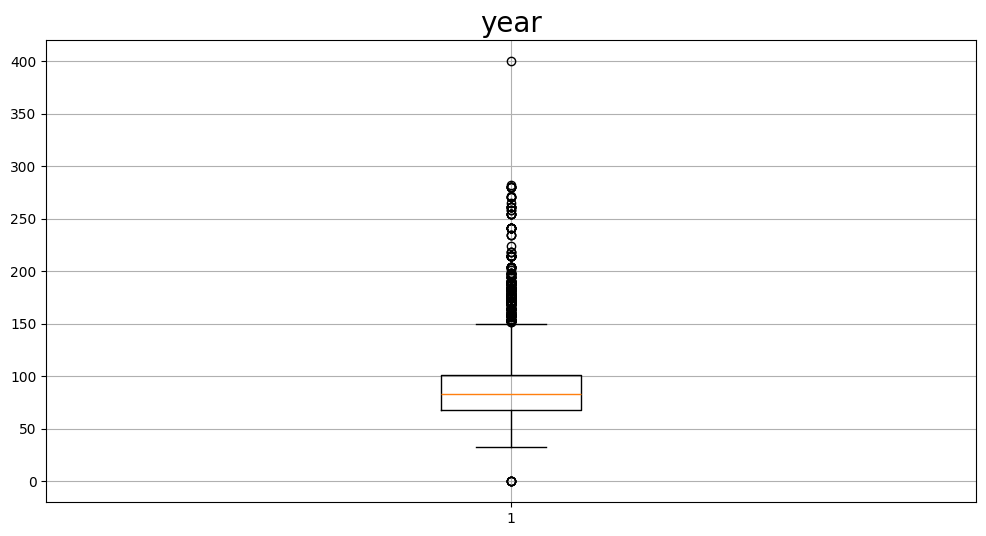

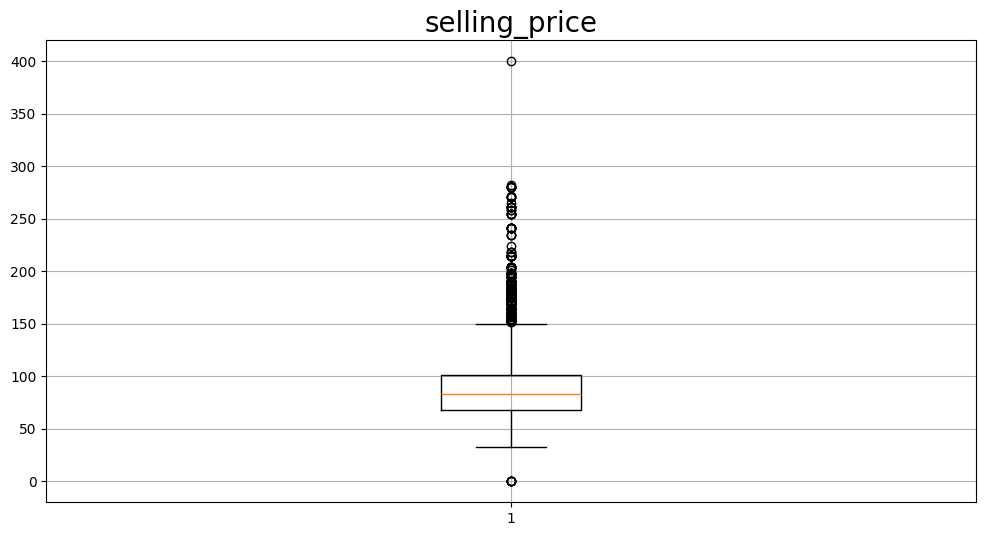

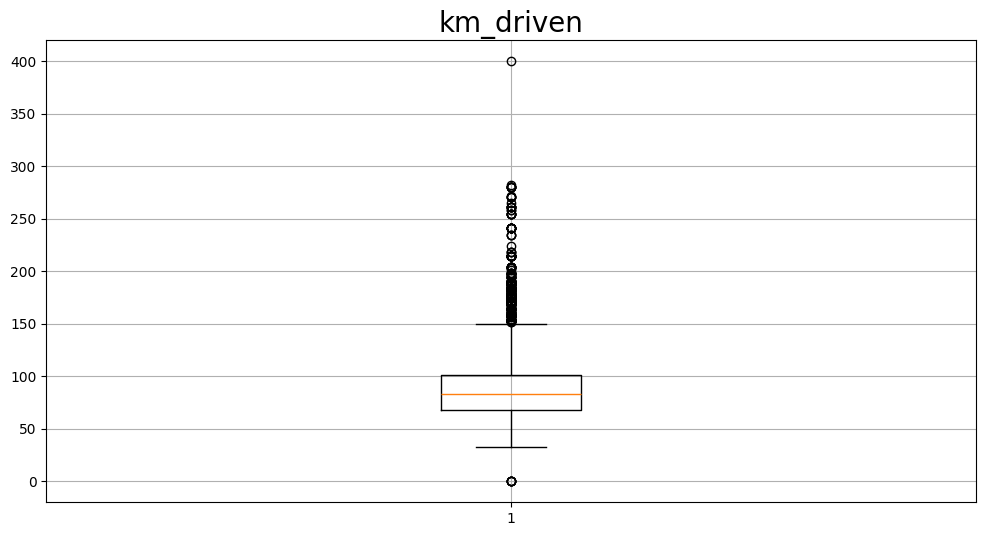

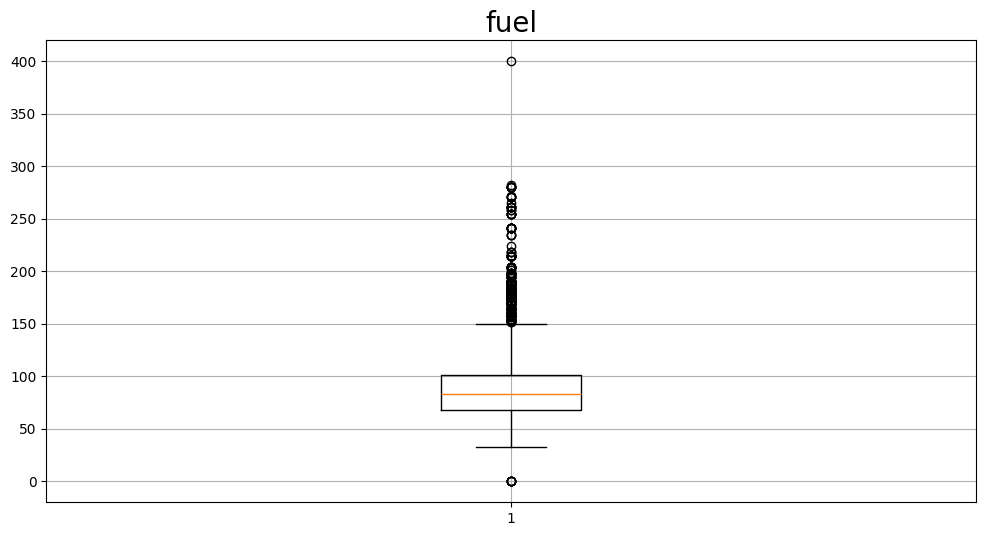

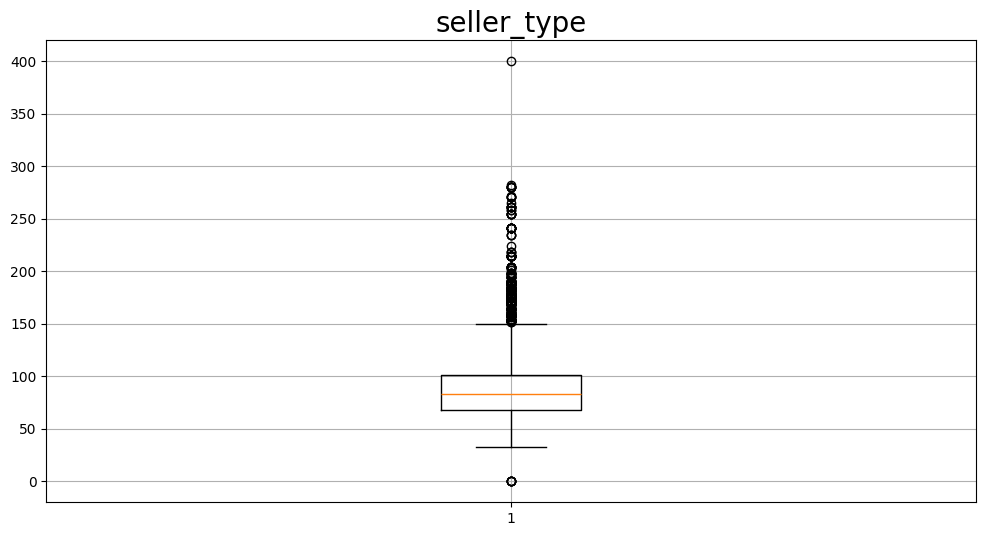

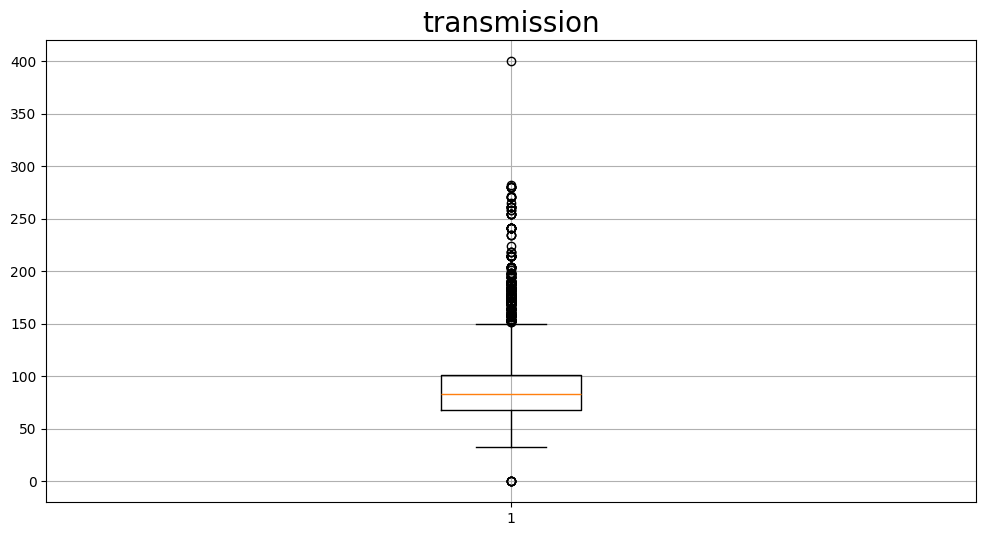

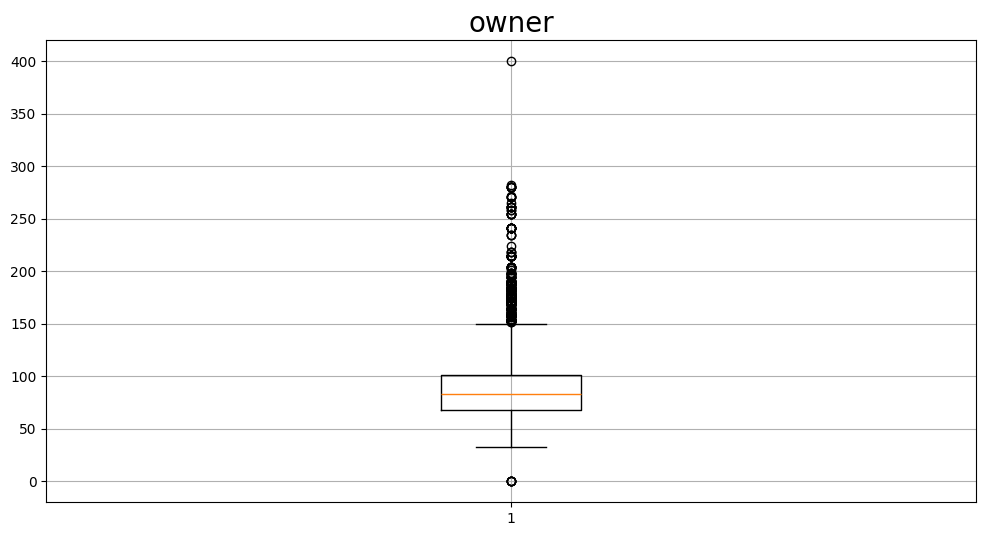

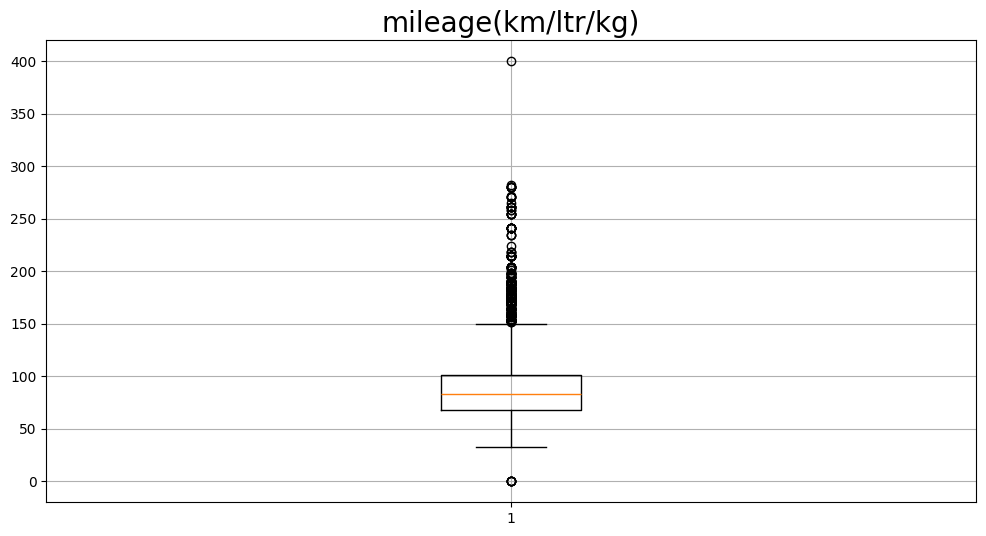

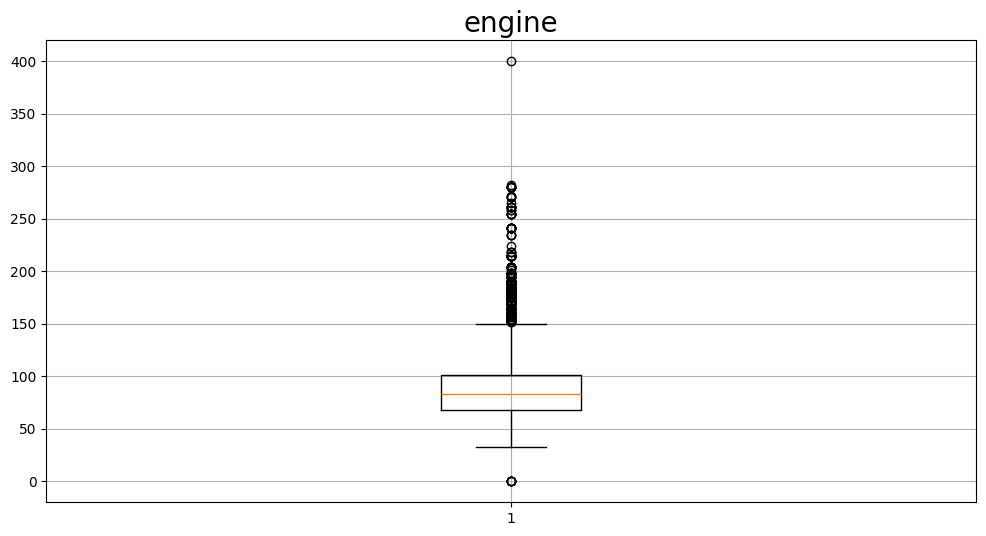

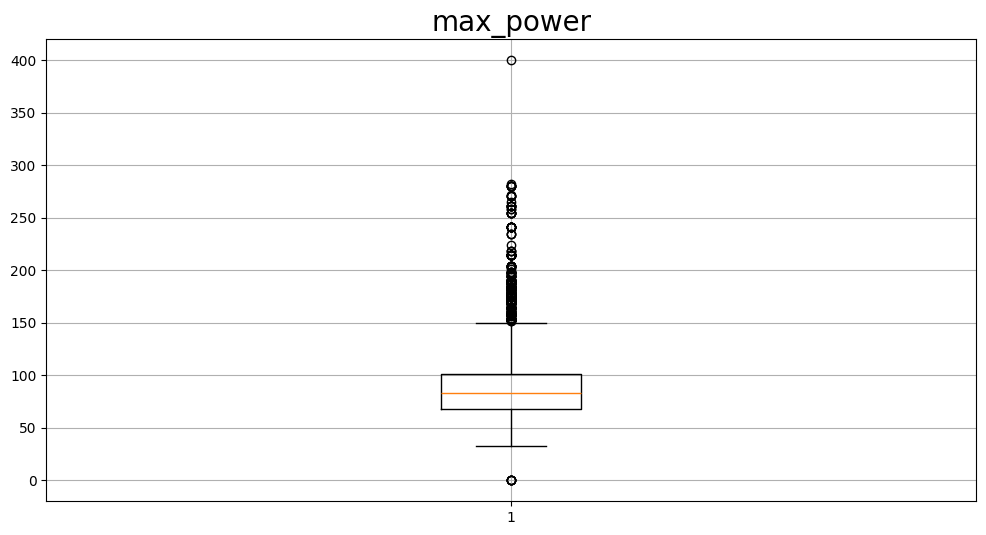

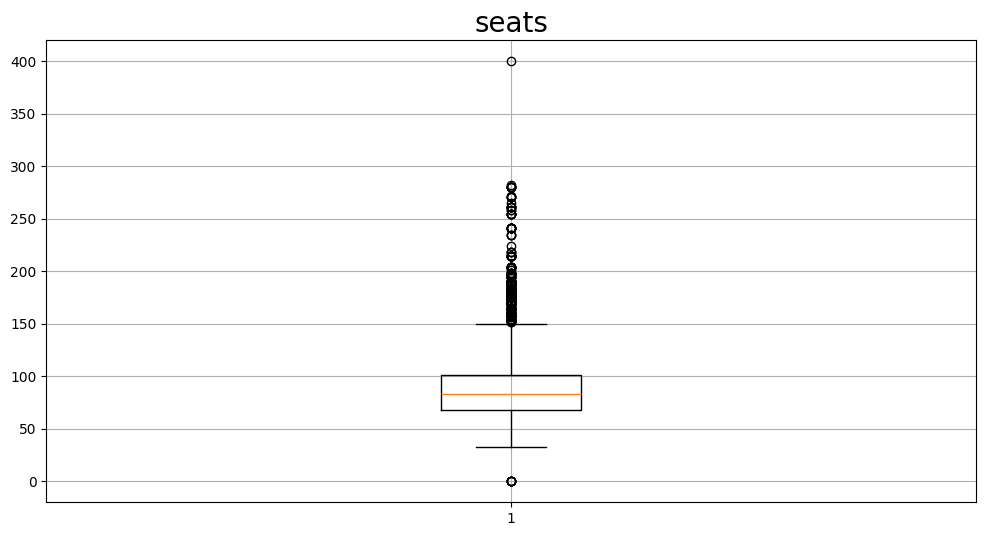

In [51]:
for i in df.columns:
    plt.figure(figsize=(12, 6))
    plt.boxplot(df['max_power'].dropna())
    plt.title(i, fontsize=20)
    plt.grid()
    plt.show()


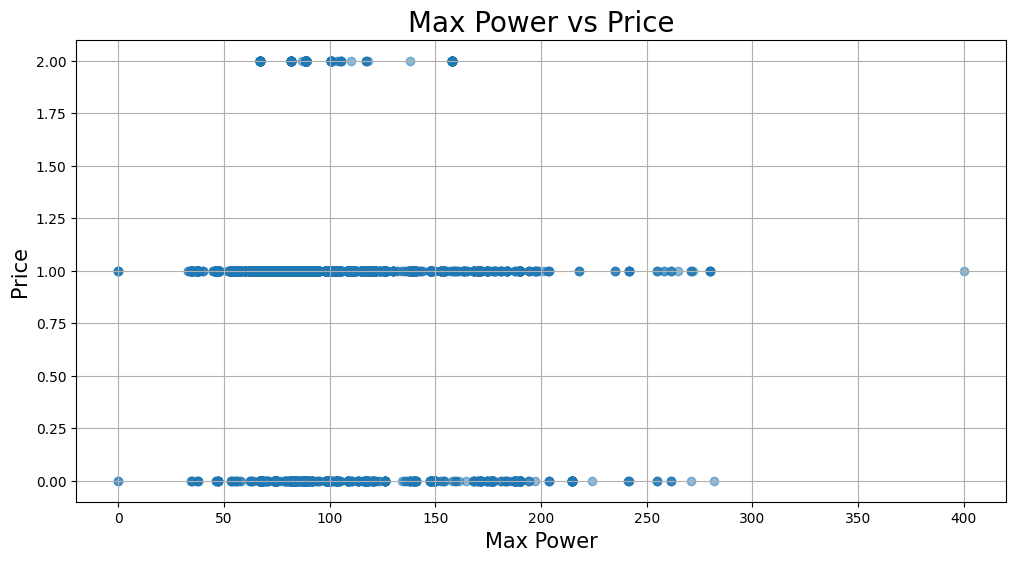

In [52]:
plt.figure(figsize=(12, 6))
plt.scatter(df['max_power'], df['seller_type'], alpha=0.5)
plt.title('Max Power vs Price', fontsize=20) 
plt.xlabel('Max Power', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.grid()
plt.show()


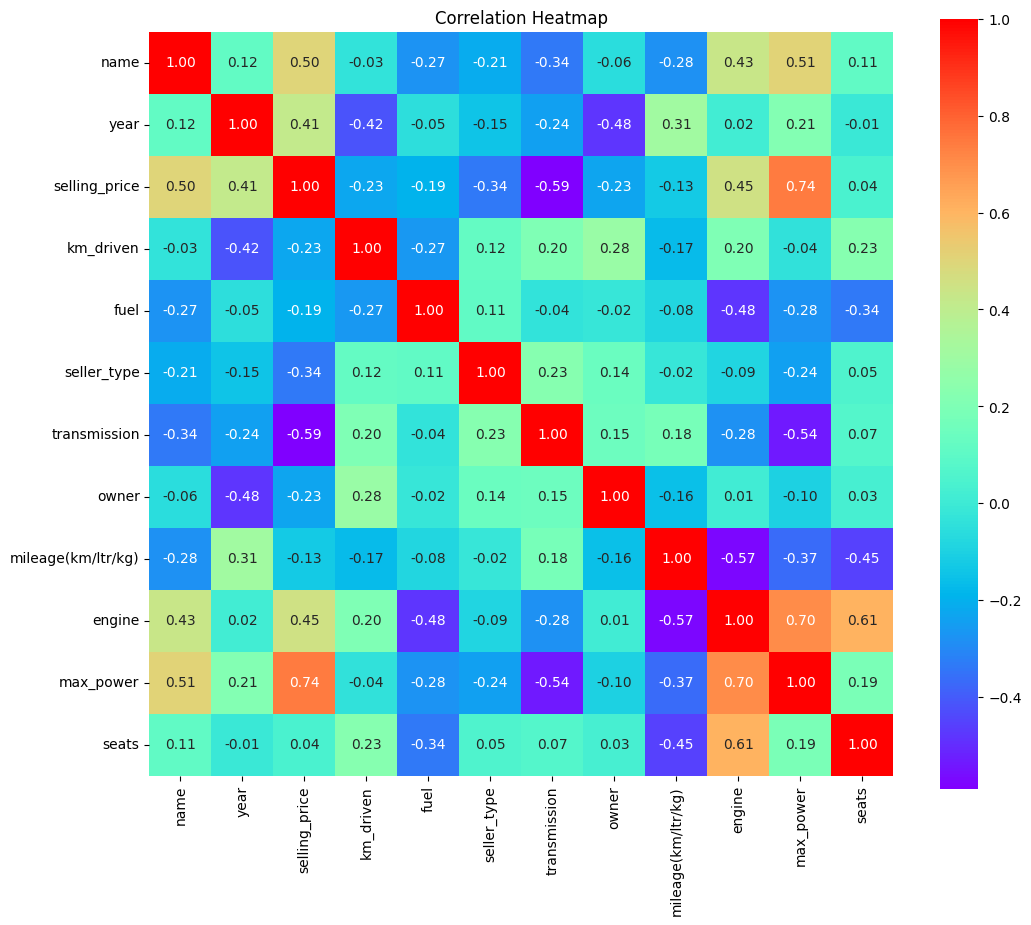

In [53]:
correlation_matrix=df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='rainbow', square=True)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\GUNATEJA\AppData\Local\Temp\ipykernel_41204\3444499868.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


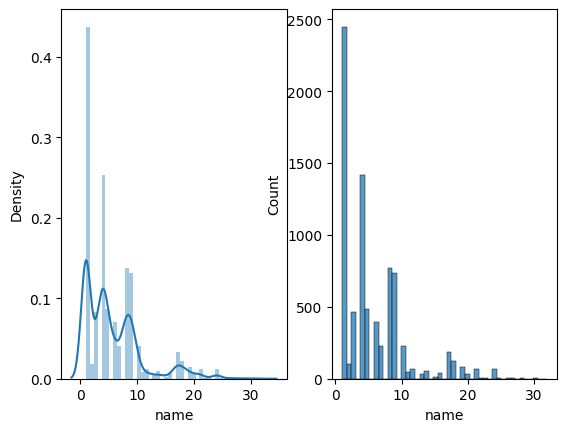

C:\Users\GUNATEJA\AppData\Local\Temp\ipykernel_41204\3444499868.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


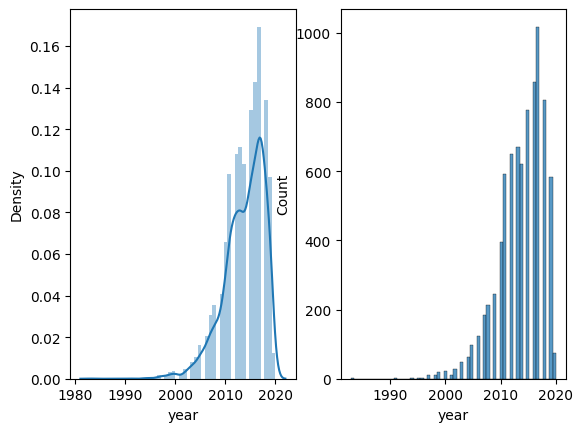

C:\Users\GUNATEJA\AppData\Local\Temp\ipykernel_41204\3444499868.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


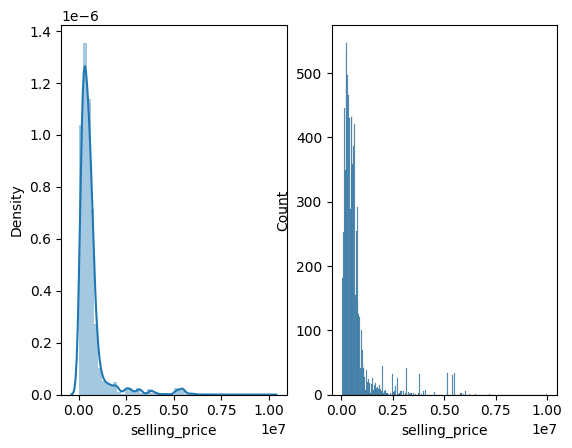

C:\Users\GUNATEJA\AppData\Local\Temp\ipykernel_41204\3444499868.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


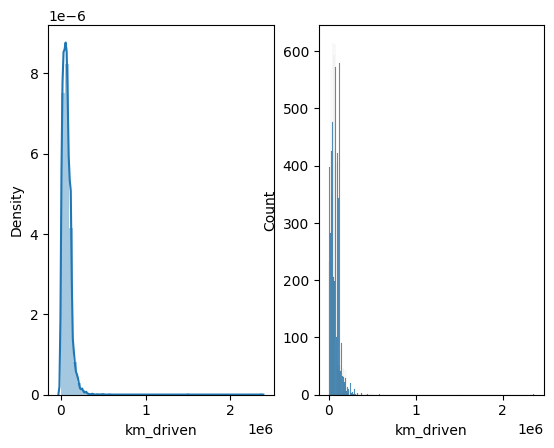

C:\Users\GUNATEJA\AppData\Local\Temp\ipykernel_41204\3444499868.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


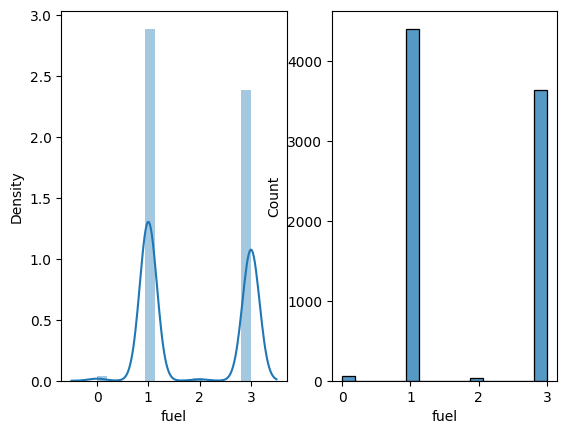

C:\Users\GUNATEJA\AppData\Local\Temp\ipykernel_41204\3444499868.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


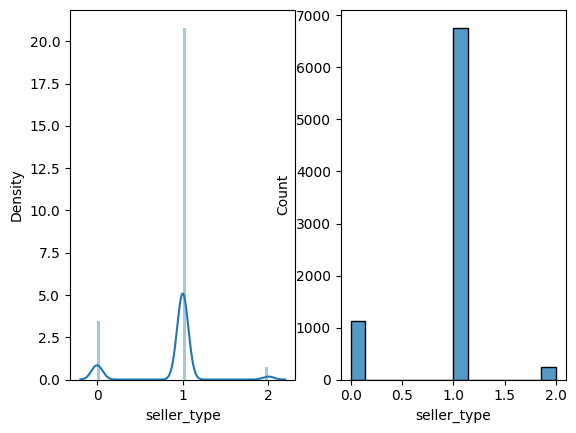

C:\Users\GUNATEJA\AppData\Local\Temp\ipykernel_41204\3444499868.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


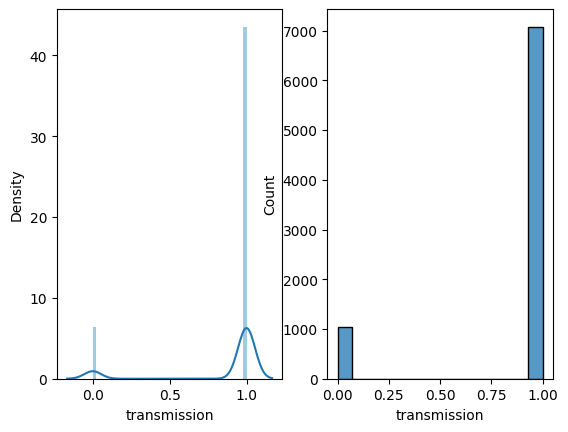

C:\Users\GUNATEJA\AppData\Local\Temp\ipykernel_41204\3444499868.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


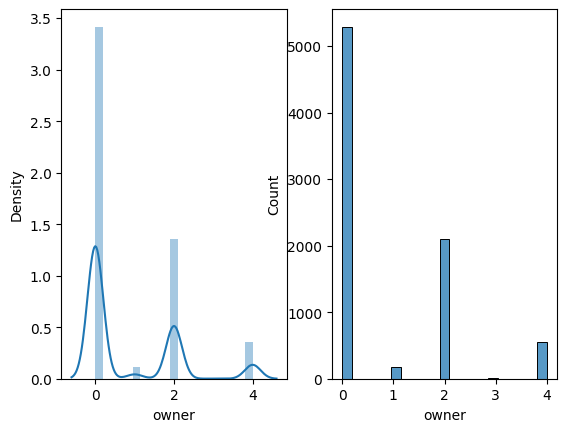

C:\Users\GUNATEJA\AppData\Local\Temp\ipykernel_41204\3444499868.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


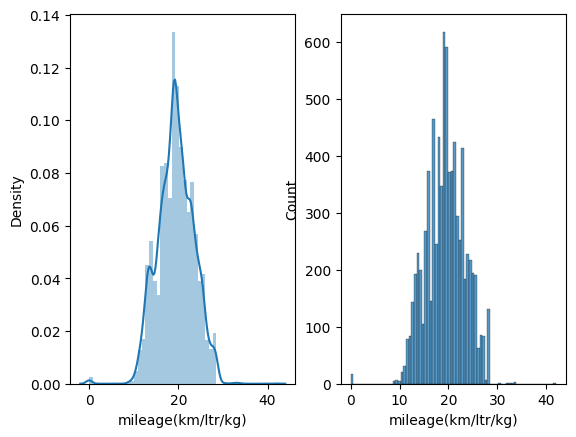

C:\Users\GUNATEJA\AppData\Local\Temp\ipykernel_41204\3444499868.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


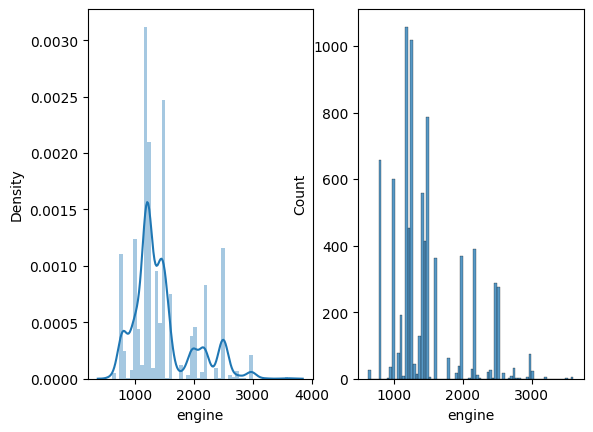

C:\Users\GUNATEJA\AppData\Local\Temp\ipykernel_41204\3444499868.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


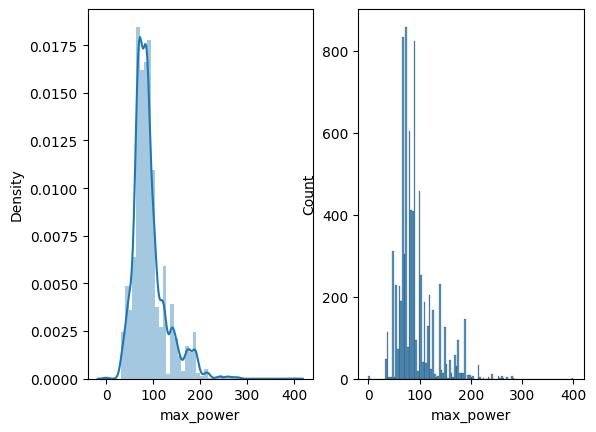

C:\Users\GUNATEJA\AppData\Local\Temp\ipykernel_41204\3444499868.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


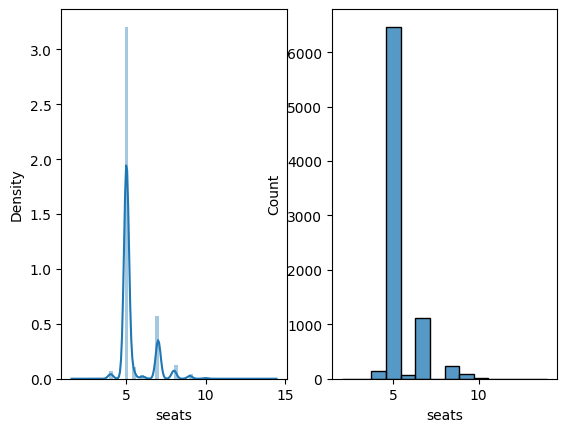

In [54]:
for i in df.columns:
  plt.figure()
  plt.subplot(1,2,1)
  sns.distplot(df[i])
  plt.subplot(1,2,2)
  sns.histplot(df[i])
  plt.show( )

In [55]:
for k,v in df.items():  #k=keys(columns names) ,v=values(columns values),items() is a method of pandas DataFrames that allows you to iterate over the columns of the DataFrame as key-value pairs
  q1=v.quantile(0.25)
  q3=v.quantile(0.75)
  iqr=q3-q1
  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column name outliers = 3.53%
Column year outliers = 1.33%
Column selling_price outliers = 7.38%
Column km_driven outliers = 2.09%
Column fuel outliers = 0.00%
Column seller_type outliers = 100.00%
Column transmission outliers = 100.00%
Column owner outliers = 0.00%
Column mileage(km/ltr/kg) outliers = 0.30%
Column engine outliers = 14.55%
Column max_power outliers = 7.20%
Column seats outliers = 100.00%


In [56]:
import sklearn

In [57]:
x=df.drop('selling_price',axis=1)
y=df['selling_price']

In [58]:
x.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,1,2014,145500,1,1,1,0,23.40,1248.0,74.00,5.0
1,2,2014,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,3,2006,140000,3,1,1,4,17.70,1497.0,78.00,5.0
3,4,2010,127000,1,1,1,0,23.00,1396.0,90.00,5.0
4,1,2007,120000,3,1,1,0,16.10,1298.0,88.20,5.0


In [59]:
df.rename(columns={"mileage(km/ltr/kg)":"mileage"},inplace=True)

In [60]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2014,450000,145500,1,1,1,0,23.40,1248.0,74.00,5.0
1,2,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,3,2006,158000,140000,3,1,1,4,17.70,1497.0,78.00,5.0
3,4,2010,225000,127000,1,1,1,0,23.00,1396.0,90.00,5.0
4,1,2007,130000,120000,3,1,1,0,16.10,1298.0,88.20,5.0


In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=22)

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def selection(model):
    model.fit(x_train,y_train)
    print(f"rmse:{np.sqrt(mean_squared_error(y_test,model.predict(x_test)))}")
    print(f"r2_score:{r2_score(y_test,model.predict(x_test))}")
    

In [63]:
from sklearn.linear_model import LinearRegression
selection(LinearRegression())

rmse:450211.2473837681
r2_score:0.6694185713408818


In [64]:
from sklearn.ensemble import RandomForestRegressor
selection(RandomForestRegressor())

rmse:175750.038171286
r2_score:0.9496224982063515


In [65]:
from xgboost import XGBRegressor
selection(XGBRegressor())

rmse:175062.41189224992
r2_score:0.9500159025192261


In [66]:
from sklearn.svm import SVR
selection(SVR())

rmse:801857.2132556614
r2_score:-0.048672433384779445


In [67]:
from catboost import CatBoostRegressor
selection(CatBoostRegressor())

Learning rate set to 0.053886
0:	learn: 780802.6535893	total: 115ms	remaining: 1m 54s
1:	learn: 747048.7609136	total: 118ms	remaining: 59s
2:	learn: 716165.7352293	total: 121ms	remaining: 40.1s
3:	learn: 685445.6795114	total: 123ms	remaining: 30.6s
4:	learn: 656689.7938008	total: 125ms	remaining: 24.9s
5:	learn: 629454.8377928	total: 127ms	remaining: 21s
6:	learn: 602222.1058257	total: 129ms	remaining: 18.3s
7:	learn: 577522.1323495	total: 132ms	remaining: 16.4s
8:	learn: 553781.2810923	total: 135ms	remaining: 14.8s
9:	learn: 531868.9370154	total: 137ms	remaining: 13.6s
10:	learn: 510973.3638438	total: 140ms	remaining: 12.6s
11:	learn: 491829.7533017	total: 143ms	remaining: 11.8s
12:	learn: 472644.2719525	total: 145ms	remaining: 11s
13:	learn: 454195.4373803	total: 149ms	remaining: 10.5s
14:	learn: 436859.7141706	total: 151ms	remaining: 9.93s
15:	learn: 421383.6590813	total: 154ms	remaining: 9.44s
16:	learn: 405857.3536138	total: 156ms	remaining: 9.03s
17:	learn: 391196.3575898	total: 

In [68]:
from sklearn.ensemble import AdaBoostRegressor
selection(AdaBoostRegressor())

rmse:423200.5398561455
r2_score:0.7078955338544454


In [69]:
from sklearn.tree import DecisionTreeRegressor
selection(DecisionTreeRegressor())

rmse:203973.29694241442
r2_score:0.9321433519852432


DecisionTreeRegressor is having good rmse value so it is better for prediction

In [70]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [71]:
import pickle

In [72]:
pickle.dump(tree,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

In [73]:
ppredict=tree.predict(x_test)

In [74]:
ppredict

array([1000000.,  400000.,  400000., ...,  450000.,  757000.,  280000.])

In [75]:
#checking
list_1=[]
for a in x_train.columns:
  list_1.append(float(input(f"enter the value of {a} : ")))
list=np.array(list_1).reshape(1,-1)
result=tree.predict(list)
print(f"predicted the price:",result)

predicted the price: [80000.]


C:\Users\GUNATEJA\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [76]:
import joblib

# Assuming you have trained your model and stored it in a variable 'model'
# Save your trained model to a file
joblib.dump(model, 'car_price_model.pkl')  # Save the model


['car_price_model.pkl']